In [109]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

import json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import scipy
from scipy.stats import ttest_ind, ttest_ind_from_stats
from scipy.special import stdtr

In [115]:
FILE_PATH = 'data/pilot2.json'
all_entries = []
with open(FILE_PATH) as file:
    for line in file:
        entry = json.loads(line)
        all_entries.append(entry)
len(all_entries)

108

In [116]:
#hint, none conditions
hint_start, none_start = [], []
hint_finish, none_finish = [], []

for entry in all_entries:  
    if isinstance(entry['data'], dict):
        condition = entry['data']['conditionNumber']
        #starts[condition].append(entry)
    else:
        condition = entry['data'][0]['conditionNumber']          
        if condition == 'hint':
            hint_finish.append(entry)
        else:
            none_finish.append(entry)


In [117]:
#calculate aha and warm ratings

hint_aha = [] #final ratings for the last anagram
hint_warm = [[] for i in range(6)]
for entry in hint_finish:
    entry_data = entry['data']
    for i in range(6): #warm ratings here 4,7, 10, 13, 16, 19
            r = entry_data[4*(i+1)-i]['responses'] #get people's warm rating here
            hint_warm[i].append(int(r[6]))
    r = entry_data[21]['responses'] #get people's aha rating here
    hint_aha.append(int(r[6]))

none_aha = [] #final ratings for the last anagram
none_warm = [[] for i in range(6)]
for entry in none_finish:
    entry_data = entry['data']
    for i in range(6): #warm ratings here 4,7, 10, 13, 16, 19
            r = entry_data[4*(i+1)-i]['responses'] #get people's warm rating here
            none_warm[i].append(int(r[6]))
    r = entry_data[21]['responses'] #get people's aha rating here
    none_aha.append(int(r[6])) 

print(hint_aha)
print(hint_warm[2])
print(none_aha)
print(none_warm[2])

[9, 9, 9, 2, 9, 0, 0, 9, 9, 8, 9, 9, 0, 9, 0, 8, 9, 9, 9, 9, 0, 2, 9, 9, 0, 9, 7, 0, 9, 9, 0, 9, 1, 9]
[2, 1, 0, 8, 0, 9, 0, 0, 0, 2, 6, 1, 9, 1, 9, 7, 0, 1, 1, 0, 9, 4, 1, 9, 0, 2, 1, 9, 0, 0, 7, 1, 9, 1]
[7, 9, 9, 0, 9, 5, 9, 9, 9, 4, 9, 4, 8, 0, 9, 6, 7, 9, 0]
[3, 1, 1, 9, 1, 9, 0, 1, 0, 4, 1, 3, 2, 0, 2, 0, 0, 0, 9]


In [118]:
#remove potentially bad subjects

hint_idx = []
for k in range(5):
    indices = [i for i, x in enumerate(hint_warm[k]) if x == 9]
    hint_idx.append(indices)
    #print(hint_warm[i].index(9))
    #print(hint_warm[i])

none_idx = []
for k in range(5):
    indices = [i for i, x in enumerate(none_warm[k]) if x == 9]
    none_idx.append(indices)
    #print(hint_warm[i].index(9))
    #print(hint_warm[i])
print(hint_idx[2])
print(none_idx[2])    
hint_aha = [i for j, i in enumerate(hint_aha) if j not in hint_idx[2]]
print(hint_aha)

none_aha = [i for j, i in enumerate(none_aha) if j not in none_idx[2]]
print(none_aha)

[5, 12, 14, 20, 23, 27, 32]
[3, 5, 18]
[9, 9, 9, 2, 9, 0, 9, 9, 8, 9, 9, 9, 8, 9, 9, 9, 9, 2, 9, 0, 9, 7, 9, 9, 0, 9, 9]
[7, 9, 9, 9, 9, 9, 9, 4, 9, 4, 8, 0, 9, 6, 7, 9]


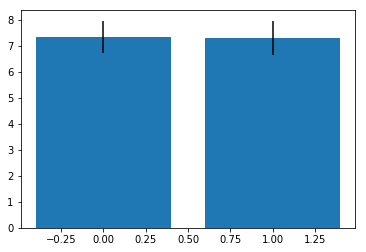

In [119]:
hint_aha_mean = np.mean(hint_aha)
hint_aha_error = stats.sem(hint_aha)
none_aha_mean = np.mean(none_aha)
none_aha_error = stats.sem(none_aha)

plt.bar(
    np.arange(2),
    [hint_aha_mean, none_aha_mean],
    yerr=[hint_aha_error, none_aha_error]
)

plt.show()


In [102]:
print('HINT')
for i in range(6):
    print(np.mean(hint_warm[i])) 
    
print('NONE')
for i in range(6):
    print(np.mean(none_warm[i])) 

HINT
2.12903225806
2.67741935484
3.1935483871
4.03225806452
3.96774193548
9.0
NONE
1.63157894737
1.68421052632
2.42105263158
2.47368421053
2.68421052632
8.57894736842
